# Folder Split


In [ ]:
!mkdir output_folder


In [ ]:
!unzip "/content/drive/MyDrive/charts.zip" -d "/content/output_folder"

Archive:  /content/drive/MyDrive/charts.zip
   creating: /content/output_folder/charts/
   creating: /content/output_folder/charts/test/
  inflating: /content/output_folder/charts/test/0.png  
  inflating: /content/output_folder/charts/test/1.png  
  inflating: /content/output_folder/charts/test/10.png  
  inflating: /content/output_folder/charts/test/11.png  
 extracting: /content/output_folder/charts/test/12.png  
 extracting: /content/output_folder/charts/test/13.png  
  inflating: /content/output_folder/charts/test/14.png  
  inflating: /content/output_folder/charts/test/15.png  
  inflating: /content/output_folder/charts/test/16.png  
  inflating: /content/output_folder/charts/test/17.png  
  inflating: /content/output_folder/charts/test/18.png  
  inflating: /content/output_folder/charts/test/19.png  
  inflating: /content/output_folder/charts/test/2.png  
  inflating: /content/output_folder/charts/test/20.png  
  inflating: /content/output_folder/charts/test/21.png  
  inflating

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil, os
import pandas as pd

In [ ]:
df = pd.read_csv('/content/output_folder/charts/train_val.csv', sep=",", names=['image_index','type'])



In [ ]:
labels = df.iloc[1:,:].sort_values('type')
class_names = list(labels.type.unique())


In [ ]:
class_names

['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical']

In [ ]:
'''l=list(labels[labels['type']==c]['image_index'])'''

"l=list(labels[labels['type']==c]['image_index'])"

In [ ]:
'''for c in class_names:
    for i in l:
      print(i+'.png')
'''

"for c in class_names:\n    for i in l:\n      print(i+'.png')\n"

In [ ]:
for i in class_names:
    os.makedirs(os.path.join('test_',i))


In [ ]:
'''for c in class_names:
  print(c)'''

'for c in class_names:\n  print(c)'

In [ ]:
for c in class_names:
    for i in list(labels[labels['type']==c]['image_index']):

        #create path to the image 
        i=i+'.png'
        #print(i)
        get_image = os.path.join('/content/output_folder/charts/train_val',i)

        #If image has not already exist in the new folder create one        
        if not os.path.exists('test_/'+c+i):
            # move the image 
            move_image_to_cat = shutil.move(get_image,'test_/'+c)

In [ ]:
for c in class_names:
    print (c)
    for i in list(labels[labels['type']==c]['image_index']):
      print(i)

dot_line
999
871
870
869
868
867
866
865
864
863
862
861
860
859
858
857
856
855
854
853
852
851
872
850
873
875
896
895
894
893
892
891
890
889
888
887
886
885
884
883
882
881
880
879
878
877
876
874
849
848
847
820
819
818
817
816
815
814
813
812
811
810
809
808
807
806
805
804
803
802
801
800
821
822
823
824
846
845
844
843
842
841
840
839
838
837
897
836
834
833
832
831
830
829
828
827
826
825
835
898
998
900
972
971
970
969
968
967
966
965
964
963
962
961
960
959
958
957
956
955
954
953
952
973
951
974
976
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
975
950
899
948
921
920
919
918
917
916
915
914
949
912
911
910
909
908
907
906
905
904
903
902
901
922
923
913
925
924
946
945
944
943
942
941
940
939
938
937
947
935
934
933
932
931
930
929
928
927
926
936
hbar_categorical
334
333
332
327
330
329
328
335
331
336
341
338
339
340
342
343
344
345
346
347
337
326
302
324
348
303
304
305
306
307
308
309
310
311
325
312
314
315
316
317
318
319
320
32

In [ ]:
import cv2

im = cv2.imread('/content/test_/dot_line/800.png')

print(type(im))
# <class 'numpy.ndarray'>

print(im.shape)
print(type(im.shape))
# (225, 400, 3)
# <class 'tuple'>

<class 'numpy.ndarray'>
(128, 128, 3)
<class 'tuple'>


# Generator

In [ ]:
import glob
train_dir='/content/test_/'
file_ = []
for i in range(5) :
    imfile = glob.glob(train_dir+class_names[i]+'/*.png')
    file_ += [len(imfile)]

(file_)

[200, 200, 200, 200, 200]

In [ ]:
'''
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (9,6))
bx = fig.add_subplot()
bx.bar(class_names,file_)
plt.xticks(rotation = 90)
plt.show()
'''

'\nimport matplotlib.pyplot as plt\nfig = plt.figure(figsize = (9,6))\nbx = fig.add_subplot()\nbx.bar(class_names,file_)\nplt.xticks(rotation = 90)\nplt.show()\n'

In [ ]:
!mkdir train
import tensorflow as tf
save_dir_new='/content/train'

In [ ]:
data_generator = ImageDataGenerator(
        validation_split=0.05,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.10,
        horizontal_flip=True,
        fill_mode='nearest')
im_shape=(128,128)
BATCH_SIZE = 16
val_data_generator = ImageDataGenerator(validation_split=0.2)
train_generator = data_generator.flow_from_directory('/content/test_/',target_size=im_shape, shuffle=True, 
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory('/content/test_/',target_size=im_shape, shuffle=False, 
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator para dataset de teste
test_generator = ImageDataGenerator()
test_generator = test_generator.flow_from_directory('/content/output_folder/charts/',target_size=im_shape,classes=['test'], shuffle=False,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 800 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


#Model

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(128,128,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))
model.add(BatchNormalization(axis=3))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))
model.add(BatchNormalization(axis=3))


model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(5,kernel_regularizer = l2(0.01),activation= "softmax"))
model.compile(optimizer="adam",loss="squared_hinge", metrics = ['accuracy'])

In [ ]:
'''from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

# learning rate reduction
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.4, 
                                            min_lr=0.00001)

# checkpoints
filepath="drive/DataScience/PlantReco/weights.best_{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', 
                             verbose=1, save_best_only=True, mode='max')
filepath="drive/DataScience/PlantReco/weights.last_auto4.hdf5"
checkpoint_all = ModelCheckpoint(filepath, monitor='val_accuracy', 
                                 verbose=1, save_best_only=False, mode='max')

# all callbacks
callbacks_list = [ learning_rate_reduction]
'''

In [ ]:
epochs = 40

BATCH_SIZE = 16
# Saving the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
   # keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/40
59/59 [==============================] - ETA: 0s - loss: 0.0972 - accuracy: 0.9829
Epoch 1: val_loss improved from inf to 0.09444, saving model to model.h5
59/59 [==============================] - 8s 141ms/step - loss: 0.0972 - accuracy: 0.9829 - val_loss: 0.0944 - val_accuracy: 0.9844
Epoch 2/40
59/59 [==============================] - ETA: 0s - loss: 0.0836 - accuracy: 0.9872
Epoch 2: val_loss did not improve from 0.09444
59/59 [==============================] - 4s 70ms/step - loss: 0.0836 - accuracy: 0.9872 - val_loss: 2.3943 - val_accuracy: 0.7865
Epoch 3/40
59/59 [==============================] - ETA: 0s - loss: 0.0812 - accuracy: 0.9861
Epoch 3: val_loss did not improve from 0.09444
59/59 [==============================] - 6s 95ms/step - loss: 0.0812 - accuracy: 0.9861 - val_loss: 0.9270 - val_accuracy: 0.8177
Epoch 4/40
59/59 [==============================] - ETA: 0s - loss: 0.0774 - accuracy: 0.9946
Epoch 4: val_loss did not improve from 0.09444
59/59 [============

# Model evaluations/ prediction


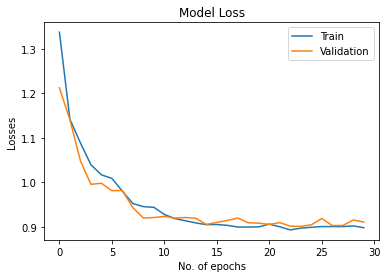

KeyError: ignored

In [ ]:

import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('No. of epochs')
plt.ylabel('Losses')
plt.legend(['Train','Validation'])
plt.show()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('No. of epochs')
plt.ylabel('accuracies')
plt.legend(['Train','Validation'])
plt.show()

In [ ]:
data_generator = ImageDataGenerator(
        validation_split=0.05,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.10,
        horizontal_flip=True,
        fill_mode='nearest')
im_shape=(128,128)
BATCH_SIZE = 16
val_data_generator = ImageDataGenerator(validation_split=0.2)
train_generator = data_generator.flow_from_directory('/content/test_/',target_size=im_shape, shuffle=True, 
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory('/content/test_/',target_size=im_shape, shuffle=False, 
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator para dataset de teste
test_generator = ImageDataGenerator()
test_generator = test_generator.flow_from_directory('/content/output_folder/charts/',target_size=im_shape,classes=['test'], shuffle=False,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 950 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Found 50 images belonging to 1 classes.
Classes: ['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical']


In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import os
import pandas as pd
import seaborn as sns
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications import vgg16
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, ReLU, Activation
from tensorflow.keras.models import Sequential

from tensorflow.keras.activations import swish,relu
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import random
import imgaug as ia
import imgaug.augmenters as iaa
from keras.utils import layer_utils
from tensorflow.keras.utils import to_categorical
from statistics import mean
import math
import cv2
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Greens):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Classification Report
                  precision    recall  f1-score   support

        dot_line       1.00      0.90      0.95        40
hbar_categorical       1.00      0.97      0.99        40
            line       0.91      1.00      0.95        40
             pie       1.00      1.00      1.00        40
vbar_categorical       0.98      1.00      0.99        40

        accuracy                           0.97       200
       macro avg       0.98      0.97      0.97       200
    weighted avg       0.98      0.97      0.97       200



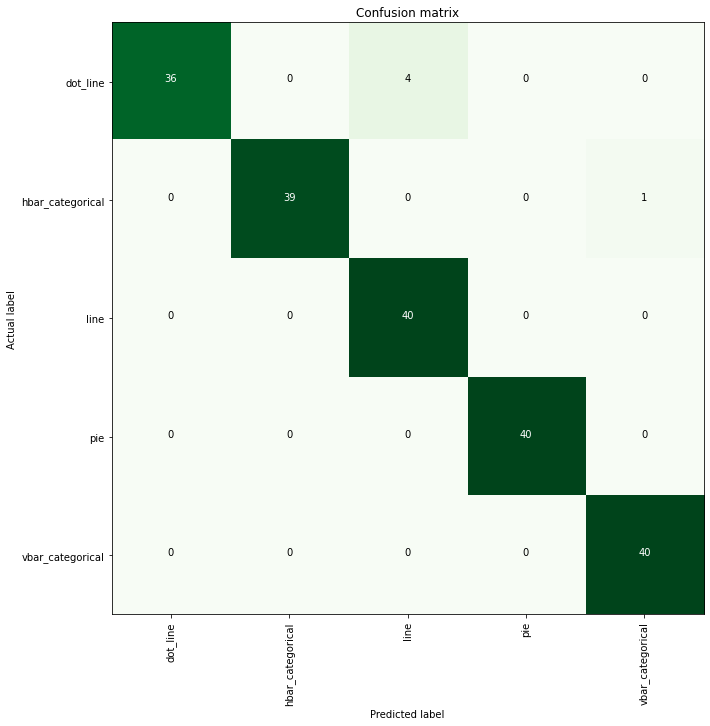

In [ ]:
#val
import itertools
predictions = model.predict_generator(validation_generator)
y_predval_vgg = np.argmax(predictions, axis=1)
cf_matrix = confusion_matrix(validation_generator.classes, y_predval_vgg)
print('Classification Report')
print(classification_report(val_ds.classes, y_predval_vgg, target_names=class_names))
#plt.figure(figsize=(20,20))
confusionMTX = confusion_matrix(validation_generator.classes, y_predval_vgg) 
plot_confusion_matrix(confusionMTX, classes =class_names) 


In [ ]:
Y_pred_vgg = model.predict_generator(validation_generator)
y_pred_vgg = np.argmax(Y_pred_vgg, axis=1)
print('Confusion Matrix')
conf_matrix_vgg = confusion_matrix(validation_generator.classes, y_pred_vgg)
cm_vgg = np.array2string(conf_matrix_vgg)
print(conf_matrix_vgg)
print("=============================================================================================")
print('Classification Report')
target_names = ['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9']
class_rep_vgg = classification_report(validation_generator.classes, y_pred_vgg, target_names=class_names)
#plot_confusion_matrix
print(class_rep_vgg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


Confusion Matrix
[[36  0  4  0  0]
 [ 0 39  0  0  1]
 [ 0  0 40  0  0]
 [ 0  0  0 40  0]
 [ 0  0  0  0 40]]
Classification Report
                  precision    recall  f1-score   support

        dot_line       1.00      0.90      0.95        40
hbar_categorical       1.00      0.97      0.99        40
            line       0.91      1.00      0.95        40
             pie       1.00      1.00      1.00        40
vbar_categorical       0.98      1.00      0.99        40

        accuracy                           0.97       200
       macro avg       0.98      0.97      0.97       200
    weighted avg       0.98      0.97      0.97       200



In [ ]:
prediction=model.predict_generator(test_generator, steps=len(test_generator))
prediction.shape
prediction_index= np.argmax(prediction, axis=1)
prediction_index.shape
(10000,)
labels=train_ds.class_indices
print(type(labels), len(labels))

labels = dict((value,key) for key,value in labels.items())
# labels
predicted_class = [labels[k] for k in prediction_index]
len(predicted_class)
# predicted_class
10000
filenames_ = test_generator.filenames
#filenames_

filenames=[]

for e in filenames_:
    e = e[5:7]
    filenames.append(e)
results = pd.DataFrame({"file_name":filenames, "category":predicted_class})
df =results.sort_values(by=["category"])  # this  will sort the whole df in decending order on the basis of the column "2"

results


<class 'dict'> 5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


,file_name,category
0,0.,vbar_categorical
1,1.,hbar_categorical
2,10,dot_line
3,11,hbar_categorical
4,12,line
5,13,line
6,14,pie
7,15,line
8,16,hbar_categorical
9,17,vbar_categorical
